In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# Load the adjusted close prices CSV
ticker = 10

file_name = f'../data/sp100_selected_data_{ticker}.csv'
# The first column (index) contains dates, so we use index_col=0 and parse as dates
df = pd.read_csv(file_name, index_col=0, parse_dates=True)

# Show the first 5 rows
df.head()


/var/folders/tt/1wm0x7wj6sg2zfqbrjhzrtrc0000gn/T/ipykernel_42639/1695544468.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, index_col=0, parse_dates=True)


,^OEX,^OEX.1,^OEX.2,^OEX.3,^OEX.4,AMZN,AMZN.1,AMZN.2,AMZN.3,AMZN.4,...,JPM,JPM.1,JPM.2,JPM.3,JPM.4,JNJ,JNJ.1,JNJ.2,JNJ.3,JNJ.4
Ticker,,,,,,,,,,,,,,,,,,,,,
Price,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,...,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,2480.75,2487.75,2467.610107421875,2477.139892578125,3325930000,180.7899932861328,183.0,179.9499969482422,180.97000122070312,29174500,...,194.32345950961061,195.24653910576725,192.94369577588645,193.30320739746094,7309000,152.81749299293443,153.23411994075104,151.8970253866848,152.87562561035156,4364700
2024-04-02,2453.830078125,2462.5,2448.010009765625,2460.820068359375,3886590000,179.07000732421875,180.7899932861328,178.3800048828125,180.69000244140625,32611500,...,192.7688101951193,194.1194252933542,192.46759611821344,193.22549438476562,7014700,151.70324717227206,152.92407650844513,151.1025089534804,152.82717895507812,6102300
2024-04-03,2454.409912109375,2471.860107421875,2454.409912109375,2462.25,3703250000,179.89999389648438,182.8699951171875,179.8000030517578,182.41000366210938,31046600,...,193.40037398423488,193.90564440304345,192.0983452381175,192.6813507080078,9353400,152.88530029729102,153.13722800366796,149.45534301464264,149.46502685546875,8098200


In [8]:
# Check for missing values and handle them
# Forward fill, then backward fill if any missing values remain
df = df.fillna(method='ffill').fillna(method='bfill')

# Confirm that there are no missing values
df.isna().sum()


/var/folders/tt/1wm0x7wj6sg2zfqbrjhzrtrc0000gn/T/ipykernel_42639/2904618954.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


^OEX       0
^OEX.1     0
^OEX.2     0
^OEX.3     0
^OEX.4     0
AMZN       0
AMZN.1     0
AMZN.2     0
AMZN.3     0
AMZN.4     0
GOOGL      0
GOOGL.1    0
GOOGL.2    0
GOOGL.3    0
GOOGL.4    0
NVDA       0
NVDA.1     0
NVDA.2     0
NVDA.3     0
NVDA.4     0
AAPL       0
AAPL.1     0
AAPL.2     0
AAPL.3     0
AAPL.4     0
UNH        0
UNH.1      0
UNH.2      0
UNH.3      0
UNH.4      0
PG         0
PG.1       0
PG.2       0
PG.3       0
PG.4       0
MSFT       0
MSFT.1     0
MSFT.2     0
MSFT.3     0
MSFT.4     0
XOM        0
XOM.1      0
XOM.2      0
XOM.3      0
XOM.4      0
JPM        0
JPM.1      0
JPM.2      0
JPM.3      0
JPM.4      0
JNJ        0
JNJ.1      0
JNJ.2      0
JNJ.3      0
JNJ.4      0
dtype: int64

In [9]:
# Convert all values to numeric (force conversion, turn invalid strings into NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Fill any resulting NaN values (forward then backward fill)
df = df.fillna(method='ffill').fillna(method='bfill')

# Now calculate daily percentage returns safely
daily_returns = df.pct_change().dropna()

# Show first few rows of daily returns
daily_returns.head()


/var/folders/tt/1wm0x7wj6sg2zfqbrjhzrtrc0000gn/T/ipykernel_42639/410132578.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,^OEX,^OEX.1,^OEX.2,^OEX.3,^OEX.4,AMZN,AMZN.1,AMZN.2,AMZN.3,AMZN.4,...,JPM,JPM.1,JPM.2,JPM.3,JPM.4,JNJ,JNJ.1,JNJ.2,JNJ.3,JNJ.4
Ticker,,,,,,,,,,,,,,,,,,,,,
Date,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-04-02,-0.010852,-0.010150,-0.007943,-0.006588,0.168572,-0.009514,-0.012077,-0.008725,-0.001547,0.117808,...,-0.008000,-0.005773,-0.002468,-0.000402,-0.040265,-0.007291,-0.002023,-0.005231,-0.000317,0.398103
2024-04-03,0.000236,0.003801,0.002614,0.000581,-0.047172,0.004635,0.011505,0.007961,0.009519,-0.047986,...,0.003276,-0.001101,-0.001919,-0.002816,0.333400,0.007792,0.001394,-0.010901,-0.022000,0.327073
2024-04-04,0.009844,0.005235,-0.009843,-0.012935,0.100568,0.022790,0.012195,0.001112,-0.013212,0.340704,...,0.006389,0.006438,-0.005105,-0.007608,-0.011718,-0.015717,-0.016134,-0.011929,-0.011409,-0.142106


In [10]:
# Calculate cumulative returns from daily returns
# (1 + daily return) cumulative product shows how $1 grows over time
cumulative_returns = (1 + daily_returns).cumprod()

# Show the first few rows of cumulative returns
cumulative_returns.head()


,^OEX,^OEX.1,^OEX.2,^OEX.3,^OEX.4,AMZN,AMZN.1,AMZN.2,AMZN.3,AMZN.4,...,JPM,JPM.1,JPM.2,JPM.3,JPM.4,JNJ,JNJ.1,JNJ.2,JNJ.3,JNJ.4
Ticker,,,,,,,,,,,,,,,,,,,,,
Date,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-04-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-04-02,0.989148,0.989850,0.992057,0.993412,1.168572,0.990486,0.987923,0.991275,0.998453,1.117808,...,0.992000,0.994227,0.997532,0.999598,0.959735,0.992709,0.997977,0.994769,0.999683,1.398103
2024-04-03,0.989382,0.993613,0.994651,0.993989,1.113448,0.995077,0.999290,0.999166,1.007957,1.064169,...,0.995250,0.993132,0.995619,0.996783,1.279710,1.000444,0.999368,0.983925,0.977690,1.855385
2024-04-04,0.999121,0.998814,0.984860,0.981131,1.225426,1.017755,1.011475,1.000278,0.994640,1.426736,...,1.001608,0.999526,0.990536,0.989199,1.264715,0.984720,0.983244,0.972188,0.966536,1.591725


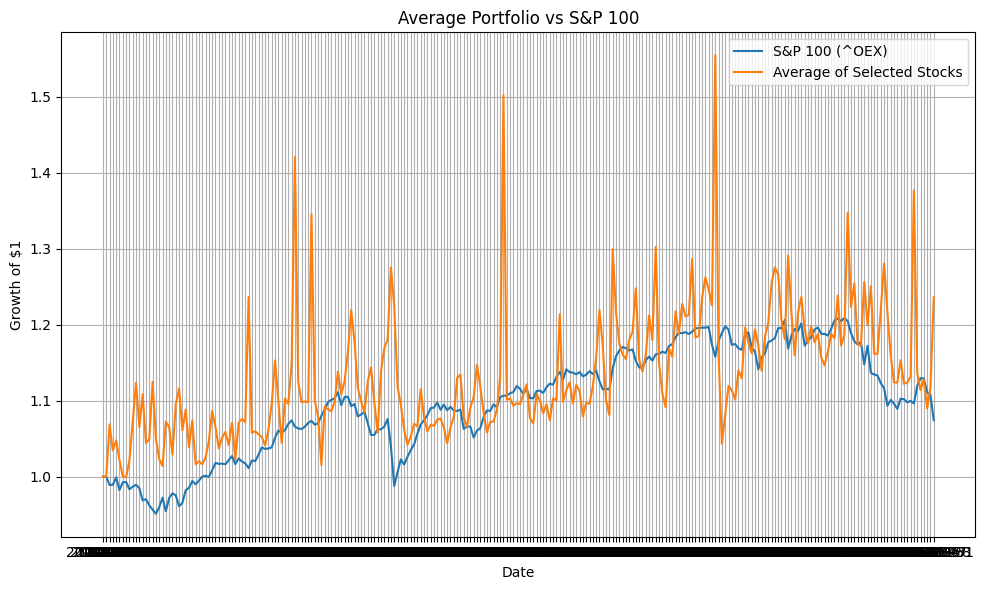

In [11]:
# Calculate average portfolio (equal weight of all selected stocks)
avg_portfolio = cumulative_returns.drop(columns='^OEX').mean(axis=1)

# Plot average vs benchmark
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns['^OEX'], label='S&P 100 (^OEX)')
plt.plot(cumulative_returns.index, avg_portfolio, label='Average of Selected Stocks')

plt.title('Average Portfolio vs S&P 100')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Approximate number of trading days per quarter
quarters = {
    '3_months': 63,
    '6_months': 126,
    '9_months': 189,
    '12_months': 252
}

# Extract data windows for each period
quarterly_returns = {
    label: cumulative_returns.tail(days)
    for label, days in quarters.items()
}

In [13]:
# For each period, compute correlation of each stock with the S&P 100 index (^OEX)
for label, data in quarterly_returns.items():
    print(f"\n📊 Correlation with ^OEX over {label.replace('_', ' ')}:")
    print(data.corr()['^OEX'].sort_values(ascending=False))



📊 Correlation with ^OEX over 3 months:
^OEX       1.000000
^OEX.1     0.990046
^OEX.2     0.979311
^OEX.3     0.958455
AMZN       0.922648
AMZN.1     0.903583
AMZN.2     0.889228
AMZN.3     0.876986
GOOGL      0.833581
GOOGL.1    0.814313
GOOGL.2    0.813268
MSFT       0.800933
GOOGL.3    0.796387
MSFT.2     0.793942
JPM.2      0.781405
MSFT.1     0.780637
JPM        0.778277
NVDA.1     0.765569
JPM.1      0.760791
MSFT.3     0.757196
NVDA       0.754777
JPM.3      0.752339
NVDA.3     0.730079
NVDA.2     0.716345
AAPL.2     0.697017
AAPL.3     0.681207
AAPL.1     0.670205
AAPL       0.661490
UNH.1      0.282429
UNH        0.270750
UNH.3      0.246178
UNH.2      0.235183
UNH.4      0.106616
JNJ.4      0.007142
MSFT.4    -0.058924
NVDA.4    -0.112817
AAPL.4    -0.125594
PG.3      -0.262213
PG.4      -0.277144
PG.1      -0.280487
PG.2      -0.287672
PG        -0.289059
GOOGL.4   -0.309275
AMZN.4    -0.346161
XOM.4     -0.369616
^OEX.4    -0.384762
XOM       -0.486792
JPM.4     -0.490716
